In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Data Loading

In [57]:
TRAIN_DIR = '/kaggle/input/cifar10-classification-image/cifar10/train'
TEST_DIR = '/kaggle/input/cifar10-classification-image/cifar10/test'

In [58]:
batch_size = 64

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(validation_split=0.2)

train_data = datagen.flow_from_directory(TRAIN_DIR,
                                         target_size=(32, 32),
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         color_mode='rgb',
                                         subset='training'
                                        )

val_data = datagen.flow_from_directory(TRAIN_DIR,
                                         target_size=(32, 32),
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         color_mode='rgb',
                                         subset='validation'
                                        )

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [60]:
test_datagen = ImageDataGenerator()
test_data = test_datagen.flow_from_directory(TEST_DIR,
                                         target_size=(32, 32),
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         color_mode='rgb',
                                        )

Found 10000 images belonging to 10 classes.


# CNN Model

## Create the model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Rescaling

model = Sequential([
    # Rescaling Layer
    Rescaling(1./255, input_shape=(32, 32, 3)),
    
    # First convolutional block
    Conv2D(filters=8, kernel_size=(5, 5), padding='Same', 
           activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2)),
#     Dropout(0.25),
    
    # Second convolutional block
    Conv2D(filters=16, kernel_size=(3, 3), padding='Same', 
           activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
#     Dropout(0.25),
    
    # Fully connected layers
    Flatten(),
    Dense(64, activation="relu"),
#     Dropout(0.5),
    Dense(10, activation="softmax")
])


## Compile the model

In [66]:
from keras.optimizers import Adam
optimizer = Adam()
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## Train the model

In [67]:
epochs = 5
# Fit the model
history = model.fit(train_data, epochs = epochs, validation_data = val_data)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 72ms/step - accuracy: 0.3371 - loss: 1.8381 - val_accuracy: 0.4831 - val_loss: 1.4418
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.4996 - loss: 1.4024 - val_accuracy: 0.5272 - val_loss: 1.3204
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.5477 - loss: 1.2717 - val_accuracy: 0.5596 - val_loss: 1.2448
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.5800 - loss: 1.1912 - val_accuracy: 0.5872 - val_loss: 1.1869
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.6071 - loss: 1.1267 - val_accuracy: 0.5813 - val_loss: 1.1890


# Plot Results

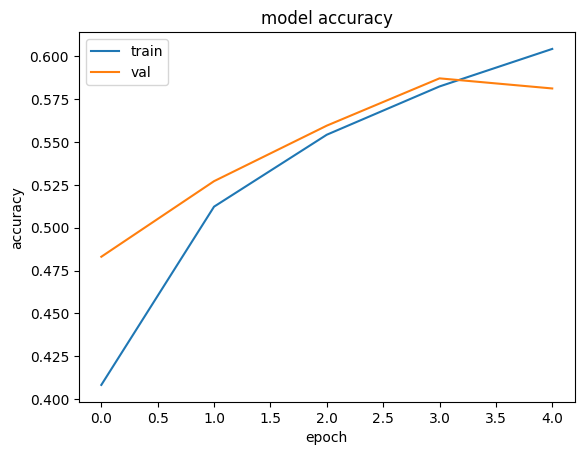

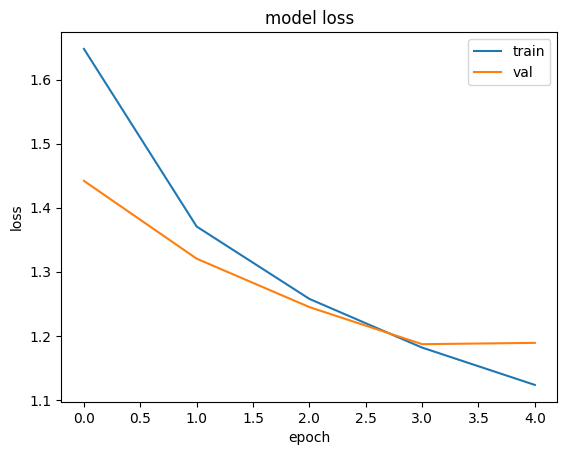

In [68]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Evaluate on Test Set

In [69]:
test_loss, test_accuracy = model.evaluate(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.5683 - loss: 1.2255


In [70]:
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.5746999979019165
